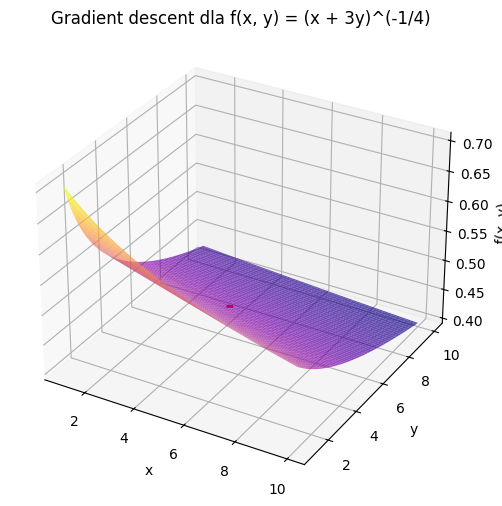

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (x + 3*y) ** (-1/4)

def grad_f(x, y):
    base = x + 3*y
    dfdx = -0.25 * (base)**(-5/4)
    dfdy = -0.75 * (base)**(-5/4)
    return np.array([dfdx, dfdy])


lr = 0.1
x, y = 5.0, 5.0
history = [(x, y)]

for _ in range(100):
    grad = grad_f(x, y)
    x -= lr * grad[0]
    y -= lr * grad[1]
    history.append((x, y))

history = np.array(history)


x_vals = np.linspace(1, 10, 100)
y_vals = np.linspace(1, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.7)
ax.plot(history[:, 0], history[:, 1], f(history[:, 0], history[:, 1]), 'r-', lw=2)
ax.set_title("Gradient descent dla f(x, y) = (x + 3y)^(-1/4)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
plt.show()


In [3]:
import numpy as np

def relu(z): return np.maximum(0, z)
def relu_deriv(z): return z > 0

def sigmoid(z): return 1 / (1 + np.exp(-z))
def sigmoid_deriv(z): return sigmoid(z) * (1 - sigmoid(z))

def tanh(z): return np.tanh(z)
def tanh_deriv(z): return 1 - np.tanh(z)**2

def elu(z, alpha=1.0): return np.where(z > 0, z, alpha * (np.exp(z) - 1))
def elu_deriv(z, alpha=1.0): return np.where(z > 0, 1, alpha * np.exp(z))

activation_map = {
    "relu": (relu, relu_deriv),
    "sigmoid": (sigmoid, sigmoid_deriv),
    "tanh": (tanh, tanh_deriv),
    "elu": (elu, elu_deriv),
}

X = np.array([[0.5], [0.2]])
Y_true = np.array([[1]])

def forward(X, architecture):
    memory = []
    A = X
    for layer in architecture:
        W = np.random.randn(layer["output_dim"], layer["input_dim"])
        b = np.random.randn(layer["output_dim"], 1)
        Z = np.dot(W, A) + b
        A = activation_map[layer["activation"]][0](Z)
        memory.append((A, Z, W, b))
    return A, memory

def backward(X, Y, memory, architecture):
    grads = []
    dA = 2 * (memory[-1][0] - Y)
    for i in reversed(range(len(architecture))):
        A, Z, W, b = memory[i]
        activation_deriv = activation_map[architecture[i]["activation"]][1]
        dZ = dA * activation_deriv(Z)
        dW = np.dot(dZ, X.T if i == 0 else memory[i-1][0].T)
        db = np.sum(dZ, axis=1, keepdims=True)
        dA = np.dot(W.T, dZ)
        grads.append((dW, db))
    return grads

# 🔁 Uruchomienie dla wariantu 10
nn_architecture = [
    {"input_dim": 2, "output_dim": 2, "activation": "elu"},
    {"input_dim": 2, "output_dim": 1, "activation": "sigmoid"}
]


output, memory = forward(X, nn_architecture)
grads = backward(X, Y_true, memory, nn_architecture)

for i, (dW, db) in enumerate(grads[::-1]):
    print(f"Warstwa {i+1}:")
    print("dW:\n", dW)
    print("db:\n", db)
    print()


Warstwa 1:
dW:
 [[0.01563511 0.00625405]
 [0.12275315 0.04910126]]
db:
 [[0.03127023]
 [0.24550629]]

Warstwa 2:
dW:
 [[0.04871311 0.01102931]]
db:
 [[-0.27884987]]

